<b><font size=8, color='#cf3759'>Final Project - From Matlab to Python: Regridding, mapping and visualization

#### Notebook completed by: Rosa M. Vargas Martes 
*Last edits to code: 14/DEC/2021*

---

## Part 1: Motivation 

The motivation behind this final project was to apply some of the programming techniques discussed over the semester, in order to acquire similar mapping and visualizations to the ones developed via MATLAB (language used for research), by only using the code presented in this notebook. At the same time, one of the main objectives of the project was to carry out regridding of data between two different datasets (described below). 

## Part 2: Importing packages

In [1]:
#Importing our packages!
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import xesmf as xe
import scipy.io
import matplotlib.ticker as mticker
import matplotlib.colors as mplc
from scipy import stats
from IPython.display import Image

## Part 3: Reading in the preprocessed data (preprocessed in Matlab)

### 3.1.1 Main Objective and Data Description

As described in the README file for this repository: 

The main objective of this project is to carry out: regridding, mapping, and visualization techniques, applied to East Pacific Easterly Wave (PEW) linear regressions and the geographic domain in which they occur (150°W-75°W and 10°S–30N°).

The data that will be read below was pre-processed in MATLAB. The pre-processing was carried out by: (1) taking data from the European Centre for Medium-range Weather Forecasting (ECMWF), Fifth Reanalysis (ERA 5), which can be accessed at the Copernicus Climate Change Service 2017 (https://cds.climate.copernicus.eu/cdsapp#!/search?text=ERA5%20back%20extension&type=dataset), at single and pressure levels, (2) taking precipitation data from the Tropical Rainfall Measuring Mission (TRMM), which can be accessed at the Global Precipitation Measurement (GPM) website (https://gpm.nasa.gov/data/directory). The ERA5 data variables used in the study are mean total precipitation rate (precip), estimated precipitation (Pest) (Ahmed et al. 2020), outgoing long wave radiation (OLR), geopotential height at 700hPa (z), and horizontal winds (u and v) at 700hPa. For TRMM precip only one variable was analyzed: accumulated precipitation (precip_trmm). For the regridding step, precip and precip_trmm were saved for the first 12 hours on 1-July-2016 at a spatial resolution of 2.5°x2.5°. For the mapping and visualization portion of the analysis, the anomalies were determined, and then a Lanczos filter (Duchon 1979) was applied to the data (2-6 days) to retain the variability associated with PEWs. Following this, an Empirical Orthogonal Function (EOF) analysis was applied to the OLR field to retain the relevant pattern in the data. The other variables were then linearly regressed onto the leading orthogonal pair (PC1 and PC2) of the OLR. The data files used below are the result of the described statistical analysis techniques, and include: 

1. TRMM
- precipitation accumulation (direct measurement) - units: (mm hr^-1)

2. ERA5
- mean total precipitation rate (direct measurement) - units: (kg m s^-1)
- geopotential height (calculated from geopotential) - units: (m)
- zonal wind (direct measurement) - units: (m s^-1)
- meridional wind (direct measurement) - units: (m s^-1)
- estimated precipitation (Calculated from Ahmed et al. 2020 work) - units: (kg m s^-1)

### Part 3.1.2: Reading in the data 

All the data that will be uploaded below can be found in the following directory within this repository: data_aos573/

In [2]:
#Reading in the .mat files

#A. ERA5 data 

#1. Raw data for regridding 

#Setting up the file path 
path = 'data_aos573/'

#precip: Read for the first 12 hrs of 1-Jul-2016, over the East Pacific Ocean (150W-75W & 10S-30N)
precip_era5_12hr_1Jul2016_pac = scipy.io.loadmat(path + 'precip_era5_12hr_1Jul2016_pac.mat')
precip_era5_12hr_1Jul2016_pac = precip_era5_12hr_1Jul2016_pac['precip_era5_12hr_1Jul2016_pac']

In [3]:
#2. Regressions for mapping and visualizations 

#precip 
S_precip_Pacific_PC1_ns = scipy.io.loadmat(path + 'S_precip_Pacific_PC1_ns.mat') #PC1
S_precip_Pacific_PC2_ns = scipy.io.loadmat(path + 'S_precip_Pacific_PC2_ns.mat') #PC2

S_precip_Pacific_PC1_ns = S_precip_Pacific_PC1_ns['S_precip_Pacific_PC1_ns']
S_precip_Pacific_PC2_ns = S_precip_Pacific_PC2_ns['S_precip_Pacific_PC2_ns']

In [4]:
#Estimated precip  
Pest_total_Pacific_PC1 = scipy.io.loadmat(path + 'Pest_total_Pacific_PC1.mat') #PC1
Pest_total_Pacific_PC2 = scipy.io.loadmat(path + 'Pest_total_Pacific_PC2.mat') #PC2

Pest_total_Pacific_PC1 = Pest_total_Pacific_PC1['Pest_total_Pacific_PC1']
Pest_total_Pacific_PC2 = Pest_total_Pacific_PC2['Pest_total_Pacific_PC2']

In [5]:
#Geopotential Height  
S_z_PC1 = scipy.io.loadmat(path + 'S_z_PC1.mat') #PC1
S_z_PC2 = scipy.io.loadmat(path + 'S_z_PC2.mat') #PC2

S_z_PC1 = S_z_PC1['S_z_PC1']
S_z_PC2 = S_z_PC2['S_z_PC2']

In [6]:
#Zonal Wind  
#Statistically Significant Wind
S_u_PC1_ss = scipy.io.loadmat(path + 'S_u_PC1_ss.mat') #PC1
S_u_PC2_ss = scipy.io.loadmat(path + 'S_u_PC2_ss.mat') #PC2

S_u_PC1_ss = S_u_PC1_ss['S_u_PC1_ss']
S_u_PC2_ss = S_u_PC2_ss['S_u_PC2_ss']

In [7]:
#Meridional Wind
#Statistically Significant Wind
S_v_PC1_ss = scipy.io.loadmat(path + 'S_v_PC1_ss.mat') #PC1
S_v_PC2_ss = scipy.io.loadmat(path + 'S_v_PC2_ss.mat') #PC2

S_v_PC1_ss = S_v_PC1_ss['S_v_PC1_ss']
S_v_PC2_ss = S_v_PC2_ss['S_v_PC2_ss']

In [8]:
#Latitude & Longitude  
lat_b = scipy.io.loadmat(path + 'lat.mat') #PC1
lon_b = scipy.io.loadmat(path + 'lon.mat') #PC2

lat_b = np.concatenate(lat_b['lat'])
lon_b = np.concatenate(lon_b['lon'])

In [9]:
#Subsetting the latitude and longitude values we will need for the rest of the assignment 

#NOTE: Some of the variables are defined on a grid that extends from 150W-75W & 10S-30N (DOMAIN #1), 
#the winds, on the other hand, had to be defined on a square grid, and thus extend from 
#165W-25W & 70S-70N (DOMAIN #2). 

#DOMAIN #2: 165W-25W & 70S-70N 
lon_u = lon_b[78:135]
lat_u = lat_b[8:65]

#DOMAIN #1: 150W-75W & 10S-30N
lon_b = lon_b[84:115]
lat_b = lat_b[24:41]

In [10]:
#B. TRMM data 

#1. Raw data for regridding 

#precip: Read for the first 12 hrs of 1-Jul-2016, over the East Pacific Ocean (152.375W-74.875W & 12.375S-27.625N)
precip_trmm_12hr_1Jul2016_pac = scipy.io.loadmat(path + 'precip_trmm_12hr_1Jul2016_pac.mat')

precip_trmm_12hr_1Jul2016_pac = precip_trmm_12hr_1Jul2016_pac['precip_trmm_12hr_1Jul2016_pac']

In [11]:
#2. Regressions for mapping and visualizations 

#TRMM precip 
S_precip_trmm_PC1 = scipy.io.loadmat(path + 'S_precip_trmm_PC1.mat') #PC1
S_precip_trmm_PC2 = scipy.io.loadmat(path + 'S_precip_trmm_PC2.mat') #PC2

S_precip_trmm_PC1 = S_precip_trmm_PC1['S_precip_trmm_PC1']
S_precip_trmm_PC2 = S_precip_trmm_PC2['S_precip_trmm_PC2']

In [12]:
#TRMM Latitude & Longitude  
lat = scipy.io.loadmat(path + 'lat_trmm.mat') #PC1
lon = scipy.io.loadmat(path + 'lon_trmm.mat') #PC2

lat = np.concatenate(lat['lat_trmm'])
lon = np.concatenate(lon['lon_trmm'])

In [13]:
#Once again, we are subsetting the latitude and longitude values associated with the TRMM data
#152.375W-74.875W & 12.375S-27.625N (DOMAIN #3). 

#Domain #3: 152.375W-74.875W & 12.375S-27.625N
lon = lon[11:43]
lat = lat[7:24]

### Part 3.2: Merging the data into single datasets
When comparing Python to MATLAB one of the main advantages to Python was the option of working with datasets. Thus, while not necessary to the main objective of the project, in order to practice this feature with the data presented in this notebook, we create three datasets (ds) for: ERA5 data (ds_era5, ds_era5_winds), and TRMM data (ds_trmm).

In [14]:
#STEP #1: Let's start by creating the data arrays for TRMM. Recall that TRMM is defined on the [lon_b,lat_b] grid:

#STEP #2: Precip Trmm (Regridding) 
precip_trmm_12hr_1Jul2016_pac = xr.DataArray(precip_trmm_12hr_1Jul2016_pac,dims=['lon','lat'],coords={'lon':('lon',lon),
                                             'lat':('lat',lat)},name='precip_trmm_12hr_1Jul2016_pac')
#STEP #3: Precip Trmm PC1 & PC2 (Visualization)
S_precip_trmm_PC1 = xr.DataArray(S_precip_trmm_PC1,dims=['lon','lat'],coords={'lon':('lon',lon),
                                 'lat':('lat',lat)},name='S_precip_trmm_PC1')

S_precip_trmm_PC2 = xr.DataArray(S_precip_trmm_PC2,dims=['lon','lat'],coords={'lon':('lon',lon),
                                 'lat':('lat',lat)},name='S_precip_trmm_PC2')

#Setting up our TRMM dataset 
ds_trmm = precip_trmm_12hr_1Jul2016_pac.to_dataset()
ds_trmm['S_precip_trmm_PC1'] = S_precip_trmm_PC1
ds_trmm['S_precip_trmm_PC2'] = S_precip_trmm_PC2
ds_trmm['lon_b'] = lon_b
ds_trmm['lat_b'] = lat_b

#Now that we have defined our new dataset, we can provide the respective units to all the variables 
ds_trmm['precip_trmm_12hr_1Jul2016_pac'].attrs['units']='mm hr^-1'
ds_trmm['S_precip_trmm_PC1'].attrs['units']='mm hr^-1'
ds_trmm['S_precip_trmm_PC2'].attrs['units']='mm hr^-1'

#Taking a look at our new dataset!
ds_trmm

<xarray.Dataset>
Dimensions:                        (lon: 32, lat: 17, lon_b: 31, lat_b: 17)
Coordinates:
  * lon                            (lon) float32 -152.4 -149.9 ... -77.38 -74.88
  * lat                            (lat) float32 -12.38 -9.875 ... 25.12 27.62
  * lon_b                          (lon_b) float32 210.0 212.5 ... 282.5 285.0
  * lat_b                          (lat_b) float32 30.0 27.5 25.0 ... -7.5 -10.0
Data variables:
    precip_trmm_12hr_1Jul2016_pac  (lon, lat) float64 0.0 2.14 0.0 ... 0.0 0.0
    S_precip_trmm_PC1              (lon, lat) float64 -0.01325 ... 0.006641
    S_precip_trmm_PC2              (lon, lat) float64 0.006929 ... -0.01463

In [15]:
#STEP #4: Now that we have created our TRMM dataset, we can go ahead and create our ERA 5 dataset 

#STEP #5: Precip ERA5 (Regridding) 
precip_era5_12hr_1Jul2016_pac = xr.DataArray(precip_era5_12hr_1Jul2016_pac,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                             'lat_b':('lat_b',lat_b)},name='precip_era5_12hr_1Jul2016_pac')

#STEP #6: Precip ERA5 PC1 & PC2 (Visualization)
S_precip_Pacific_PC1_ns = xr.DataArray(S_precip_Pacific_PC1_ns,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                       'lat_b':('lat_b',lat_b)},name='S_precip_Pacific_PC1_ns')

S_precip_Pacific_PC2_ns = xr.DataArray(S_precip_Pacific_PC2_ns,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                       'lat_b':('lat_b',lat_b)},name='S_precip_Pacific_PC2_ns')

#STEP #7: Estimated Precip ERA5 PC1 & PC2 (Visualization)
Pest_total_Pacific_PC1 = xr.DataArray(Pest_total_Pacific_PC1,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                      'lat_b':('lat_b',lat_b)},name='Pest_total_Pacific_PC1')

Pest_total_Pacific_PC2 = xr.DataArray(Pest_total_Pacific_PC2,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                       'lat_b':('lat_b',lat_b)},name='Pest_total_Pacific_PC2')

#STEP #8: Geopotential Height ERA5 PC1 & PC2 (Visualization)
S_z_PC1 = xr.DataArray(S_z_PC1,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                      'lat_b':('lat_b',lat_b)},name='S_z_PC1')

S_z_PC2 = xr.DataArray(S_z_PC2,dims=['lon_b','lat_b'],coords={'lon_b':('lon_b',lon_b),
                                       'lat_b':('lat_b',lat_b)},name='S_z_PC2')

#Creating our ERA5 dataset 
ds_era5 = precip_era5_12hr_1Jul2016_pac.to_dataset()
ds_era5['S_precip_Pacific_PC1_ns'] = S_precip_Pacific_PC1_ns
ds_era5['S_precip_Pacific_PC2_ns'] = S_precip_Pacific_PC2_ns
ds_era5['Pest_total_Pacific_PC1'] = Pest_total_Pacific_PC1
ds_era5['Pest_total_Pacific_PC2'] = Pest_total_Pacific_PC2
ds_era5['S_z_PC1'] = S_z_PC1
ds_era5['S_z_PC2'] = S_z_PC2
ds_era5['lon'] = lon
ds_era5['lat'] = lat

#Now that we have defined our new dataset, we can provide the respective units to all the variables 
ds_era5['precip_era5_12hr_1Jul2016_pac'].attrs['units']='kg m^-2 s^-1'
ds_era5['S_precip_Pacific_PC1_ns'].attrs['units']='kg m^-2 s^-1'
ds_era5['S_precip_Pacific_PC2_ns'].attrs['units']='kg m^-2 s^-1'
ds_era5['Pest_total_Pacific_PC1'].attrs['units']='kg m^-2 s^-1'
ds_era5['Pest_total_Pacific_PC2'].attrs['units']='kg m^-2 s^-1'
ds_era5['S_z_PC1'].attrs['units']='m'
ds_era5['S_z_PC2'].attrs['units']='m'

#Taking a look at our new dataset!
ds_era5

<xarray.Dataset>
Dimensions:                        (lon_b: 31, lat_b: 17, lon: 32, lat: 17)
Coordinates:
  * lon_b                          (lon_b) float32 210.0 212.5 ... 282.5 285.0
  * lat_b                          (lat_b) float32 30.0 27.5 25.0 ... -7.5 -10.0
  * lon                            (lon) float32 -152.4 -149.9 ... -77.38 -74.88
  * lat                            (lat) float32 -12.38 -9.875 ... 25.12 27.62
Data variables:
    precip_era5_12hr_1Jul2016_pac  (lon_b, lat_b) float64 1.09e-06 ... -1.735...
    S_precip_Pacific_PC1_ns        (lon_b, lat_b) float64 3.96e-07 ... 9.482e-07
    S_precip_Pacific_PC2_ns        (lon_b, lat_b) float64 3.941e-07 ... 2.807...
    Pest_total_Pacific_PC1         (lon_b, lat_b) float64 -2.002e-07 ... -1.3...
    Pest_total_Pacific_PC2         (lon_b, lat_b) float64 -3.4e-07 ... 8.175e-08
    S_z_PC1                        (lon_b, lat_b) float64 0.8636 ... -0.04655
    S_z_PC2                        (lon_b, lat_b) float64 0.4478 ... 0.1669

In [16]:
#STEP #9: Creating a separate dataset for our winds (they are in a separate grid! 57x57!)

#Statistically Significant
#STEP #10: Zonal Winds ERA5 PC1 & PC2 (Visualization)
S_u_PC1_ss = xr.DataArray(S_u_PC1_ss,dims=['lon_u','lat_u'],coords={'lon_u':('lon_u',lon_u),
                                     'lat_u':('lat_u',lat_u)},name='S_u_PC1_ss')

S_u_PC2_ss = xr.DataArray(S_u_PC2_ss,dims=['lon_u','lat_u'],coords={'lon_u':('lon_u',lon_u),
                                     'lat_u':('lat_u',lat_u)},name='S_u_PC2_ss')

#STEP #11: Meridional Winds ERA5 PC1 & PC2 (Visualization)
S_v_PC1_ss = xr.DataArray(S_v_PC1_ss,dims=['lon_u','lat_u'],coords={'lon_u':('lon_u',lon_u),
                                     'lat_u':('lat_u',lat_u)},name='S_v_PC1_ss')

S_v_PC2_ss = xr.DataArray(S_v_PC2_ss,dims=['lon_u','lat_u'],coords={'lon_u':('lon_u',lon_u),
                                     'lat_u':('lat_u',lat_u)},name='S_v_PC2_ss')

#Creating our ERA5 winds dataset  
ds_era5_winds = S_u_PC1_ss.to_dataset()
ds_era5_winds['S_u_PC2_ss'] = S_u_PC2_ss
ds_era5_winds['S_v_PC1_ss'] = S_v_PC1_ss
ds_era5_winds['S_v_PC2_ss'] = S_v_PC2_ss

#Now that we have defined our new dataset, we can provide the respective units to all the variables 
ds_era5_winds['S_u_PC1_ss'].attrs['units']='m s^-1'
ds_era5_winds['S_u_PC2_ss'].attrs['units']='m s^-1'
ds_era5_winds['S_v_PC1_ss'].attrs['units']='m s^-1'
ds_era5_winds['S_v_PC2_ss'].attrs['units']='m s^-1'

#Taking a look at our new dataset!
ds_era5_winds

<xarray.Dataset>
Dimensions:     (lon_u: 57, lat_u: 57)
Coordinates:
  * lon_u       (lon_u) float32 195.0 197.5 200.0 202.5 ... 330.0 332.5 335.0
  * lat_u       (lat_u) float32 70.0 67.5 65.0 62.5 ... -62.5 -65.0 -67.5 -70.0
Data variables:
    S_u_PC1_ss  (lon_u, lat_u) float64 nan nan nan nan nan ... nan nan nan nan
    S_u_PC2_ss  (lon_u, lat_u) float64 nan nan nan nan nan ... nan nan nan nan
    S_v_PC1_ss  (lon_u, lat_u) float64 -0.0145 0.03973 ... -0.1332 -0.0569
    S_v_PC2_ss  (lon_u, lat_u) float64 0.1012 0.06921 ... -0.07042 -0.009813

## Part 4: Regridding the TRMM data onto the ERA5 data grid
From the sections above we know that the TRMM data is defined on a different grid than the ERA5 data. While both datasets were read in every 2.5 degrees, they are defined at slightly different grid points. In some of my previous research applications, this has shown to be somewhat of a hurdle during the analysis. Thus, in this section we will carry out the regridding of the TRMM data onto the ERA5 grid. We will then develop a simple plot, a zonal mean of the TRMM precipitation showing the regridded and original data, in order to see the outcome of the regridding process (as we did for Homework 5).

### Part 4.1. Creating the target grid from the ERA5 data 

In [17]:
#STEP #1: To create our target grids following the regridding lecture, ClassNotebook7, 
#and Homework 5, we carry out a meshgrid of our ERA5 lat and lon variables
lon2d,lat2d=np.meshgrid(ds_era5['lon_b'],ds_era5['lat_b'])

#STEP #2: Now we create a meshgrid from our old TRMM data set lat, lon variables
lon2d_old,lat2d_old=np.meshgrid(ds_trmm['lon'],ds_trmm['lat'])

#STEP #3: set up the target grid as an xarray Dataset
target_grid=xr.Dataset({'lon': (['y', 'x'], lon2d),'lat': (['y', 'x'], lat2d)})

### Part 4.2. Setting up the conservative regridder

In [18]:
#Using the in-class examples to carry out the bilinear regridding ('bilinear')

#Bilinear
regridder_bilinear=xe.Regridder(ds_trmm['precip_trmm_12hr_1Jul2016_pac'], 
                                target_grid, 'bilinear',periodic=True,reuse_weights=False)

/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


### Part 4.3. Regridding 
Now, as done in class, we apply the regridders to the precipitation data 

In [19]:
precip_trmm_regrid_bilinear=regridder_bilinear(ds_trmm.precip_trmm_12hr_1Jul2016_pac) 

/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/xesmf/frontend.py:534: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


In [20]:
#Taking a look at the shape of our original and regridded data:
print('The shape of the original TRMM precipitation is:', np.shape(ds_trmm.precip_trmm_12hr_1Jul2016_pac))
print('The shape of the regridded TRMM precipitation is:', np.shape(precip_trmm_regrid_bilinear))
print('The shape of the ERA5 precipitation is:', np.shape(ds_era5.precip_era5_12hr_1Jul2016_pac))

The shape of the original TRMM precipitation is: (32, 17)
The shape of the regridded TRMM precipitation is: (17, 31)
The shape of the ERA5 precipitation is: (31, 17)


While the data is now defined as (lat,lon) rather than (lon,lat), the size of the dimensions now correspond to those of the ERA5 data! Now let's see how well the regridding turned out by making the simple plot we described above.

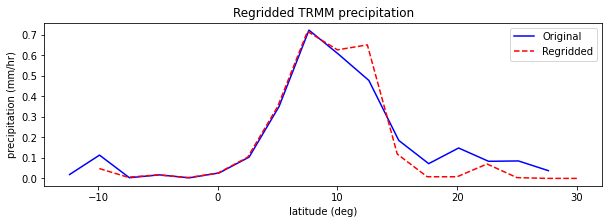

In [21]:
#STEP #1: Now that we have successfully regridded our data, 
#we calculate the zonal mean of the original and regridded 
#TRMM precipitation

#Original
ds_zonal_mean_orig = ds_trmm['precip_trmm_12hr_1Jul2016_pac'].mean(dim="lon")

#Regridded
ds_zonal_mean_interp = precip_trmm_regrid_bilinear.mean(dim="x")

#STEP #2: PLOTTING THE DATA
fig,ax=plt.subplots(1,1,figsize=(10,3))
axs=ax
axs.plot((ds_zonal_mean_orig.lat).T,ds_zonal_mean_orig.T,'b',label='Original')
axs.set_title('Regridded TRMM precipitation')
axs.set_xlabel('latitude (deg)')
axs.set_ylabel('precipitation (mm/hr)')
axs.plot((precip_trmm_regrid_bilinear.lat[:,1]),(ds_zonal_mean_interp).T,'r--',label='Regridded')
axs.legend()
plt.subplots_adjust(wspace=0.3)

As discussed in class, and in the Homework 5 assignment, we see that while the regridding of the data through the bilinear method worked, it does not do an outstanding job where the curve reaches a maximum. As discussed, this can be a result of discontinuity in the data that the bilienear interpolation does not work well with. Other than this we see that the data now extends to the values we wanted it to!

## PART 5. Visualizations: Geographic Maps and Correlation Figures 

### Part 5.1. Geographic Maps
Here we will use the ERA5 and TRMM data to create some geographic maps that capture the predominant pattern of the linearly regressed PEW data. Here, as discussed above, the data was regressed onto the leading orthogonal pair of the OLR field resulting from an EOF analysis. The maps will have regressed fields (shading), geopotential height (contours), and winds (vectors) overlaid in the same plot. 

#### Part 5.1.1. Creating our own colorbar
As we did in class, we use [chroma.js Color Palette Helper](https://vis4.net/palettes/#/9|s|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1) to create our own color blind safe palette. 

In [22]:
#Setting up our own color pallete!

cmap=mplc.ListedColormap(['#ff9242', '#ffab64', '#ffc284', '#ffd8a6', '#ffedca', '#ffffff', '#bbf6fe', '#90e5fd', '#77d1fe', '#6cbafe', '#6ba1ff'])

#### Part 5.1.2. Creating our figures using cartopy!

The code below maps the regression fields over the region of interest for PEWs, 150°W-75°W and 10°S–30N°. For the maps that follow we use a Mercator projection and the colormap created above. The objective of the code below is to recreate a similar image to the one presented below, which is a figure developed for research via MATLAB. The difference between the two figures is that the MATLAB figure was developed over the Pacific and Africa for PC1. The figure we will create here, while similar, will be solely for the Pacific region and for PC1 and PC2.

OLD MATLAB FIGURE:


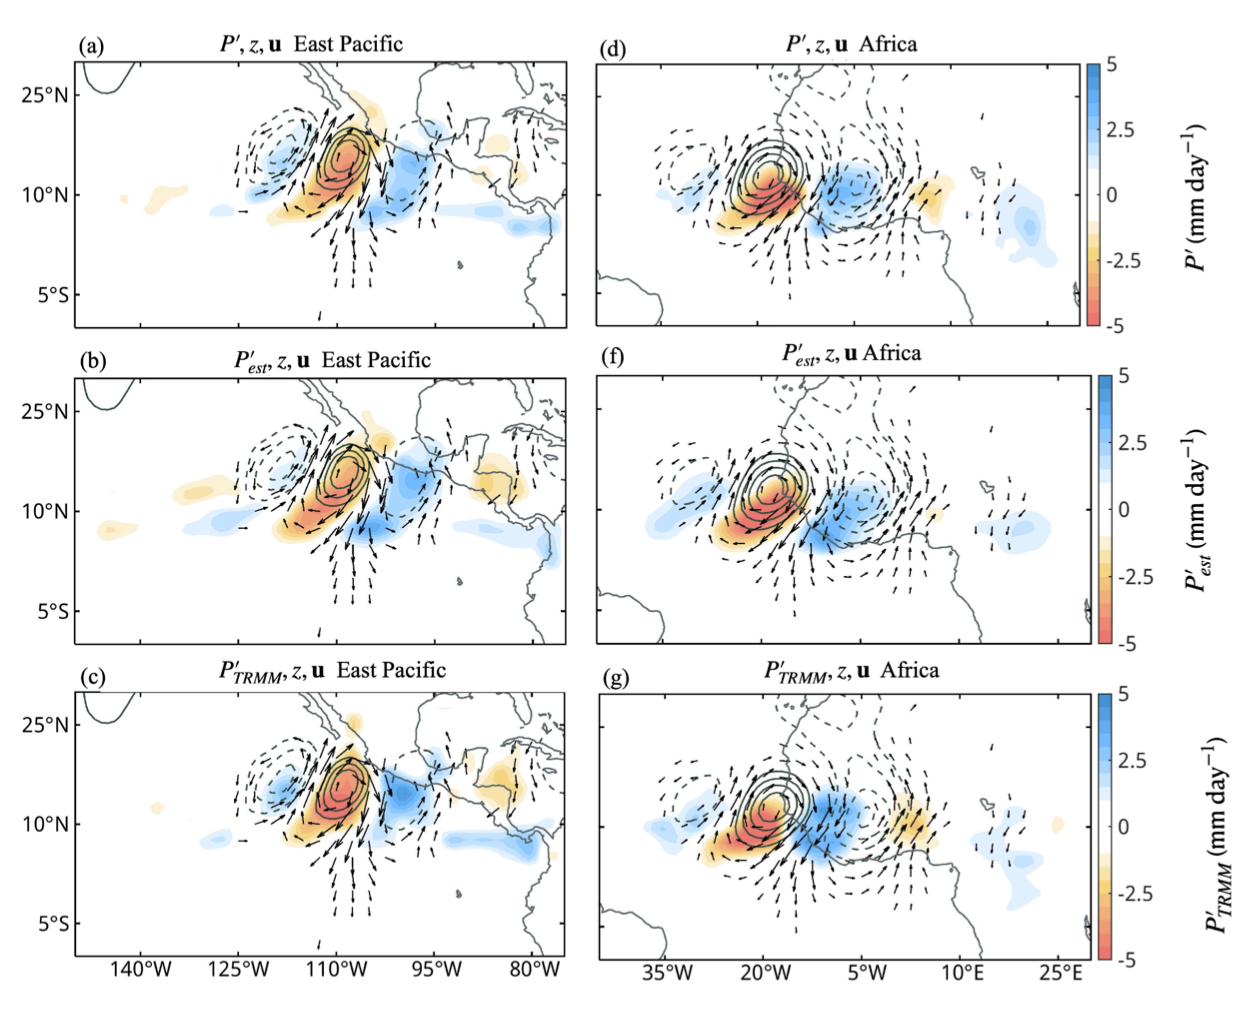

In [23]:
print('OLD MATLAB FIGURE:')
Image("MATLABFigure_Example.png",width=650, height=650)

/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right at

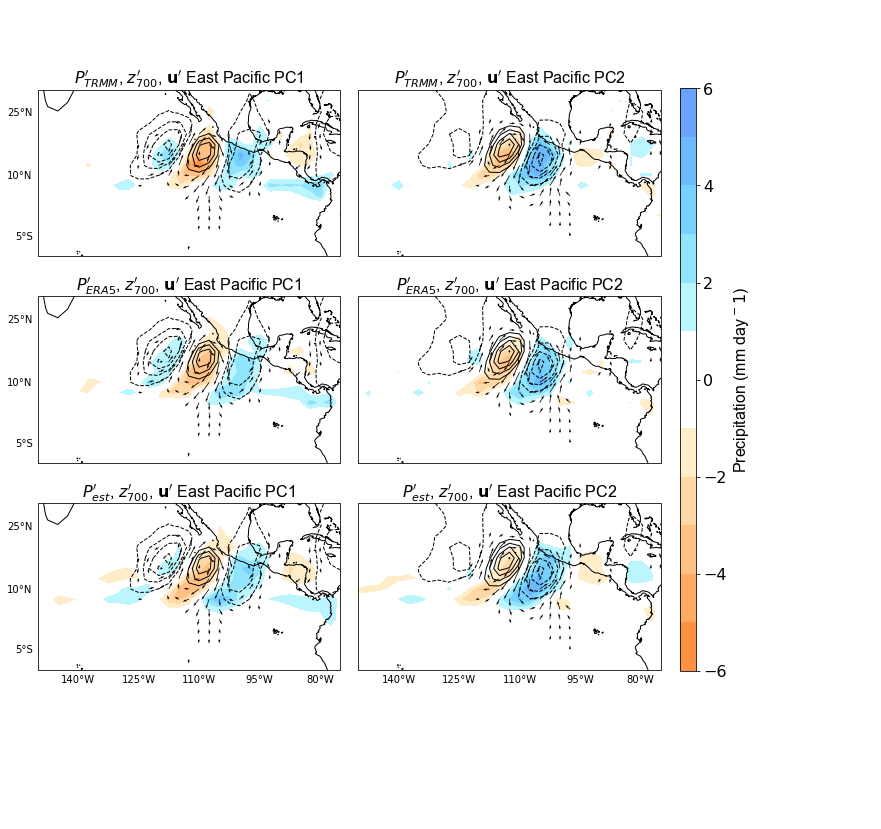

In [24]:
#NEW FIGURE! Following the In-class steps and examples

#STEP #3: Plotting 
fig,ax=plt.subplots()
fig.set_size_inches(15,15)
fig.patch.set_visible(False)
ax.axis('off')

#set up the gridspec
gs=gridspec.GridSpec(nrows=12,ncols=8)

#Meshgridding the lon_u and lat u to use below 
lon_u2d,lat_u2d = np.meshgrid(ds_era5_winds.lon_u,ds_era5_winds.lat_u)

#statistically significant winds 
#PC1
u1_stat = ds_era5_winds['S_u_PC1_ss']
v1_stat = ds_era5_winds['S_v_PC1_ss']

#PC2
u2_stat = ds_era5_winds['S_u_PC2_ss']
v2_stat = ds_era5_winds['S_v_PC2_ss']

#Setting the levels to be used later by the colorbar 
levels = np.linspace(-6, 6, 13)

#Axis 1: TRMM Precip - PC1
ax1=fig.add_subplot(gs[1:4,0:3],projection=ccrs.Mercator())
ax1.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c1 = ax1.contourf(lon2d_old.T,lat2d_old.T,ds_trmm['S_precip_trmm_PC1']*24,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6) 
ax1.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax1.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax1.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u1_stat), np.array(v1_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax1.coastlines(color='k')
ax1.set_title('$P_{TRMM}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC1',fontname='arial',fontsize=16)
grid1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid1.xlabels_top = False
grid1.xlabels_bottom = False
grid1.ylabels_right = False
grid1.xlines = False
grid1.ylines = False
grid1.ylocator = mticker.FixedLocator([-5, 10, 25])

#Axis 2: TRMM Precip - PC2
ax2=fig.add_subplot(gs[1:4,3:6],projection=ccrs.Mercator())
ax2.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c2 = ax2.contourf(lon2d_old.T,lat2d_old.T,ds_trmm['S_precip_trmm_PC2']*24,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6)
ax2.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax2.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax2.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u2_stat), np.array(v2_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax2.coastlines(color='k')
ax2.set_title('$P_{TRMM}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC2',fontname='arial',fontsize=16)
grid2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid2.xlabels_top = False
grid2.xlabels_bottom = False
grid2.ylabels_right = False
grid2.ylabels_left = False
grid2.xlines = False
grid2.ylines = False
grid2.ylocator = mticker.FixedLocator([-5, 10, 25])

#Axis 3: ERA5 Precip - PC1
ax3=fig.add_subplot(gs[4:7,0:3],projection=ccrs.Mercator())
ax3.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c3 = ax3.contourf(lon2d.T,lat2d.T,ds_era5['S_precip_Pacific_PC1_ns']*24*3600,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6)
ax3.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax3.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax3.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u1_stat), np.array(v1_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax3.coastlines(color='k')
ax3.set_title('$P_{ERA5}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC1',fontname='arial',fontsize=16)
grid3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid3.xlabels_top = False
grid3.xlabels_bottom = False
grid3.ylabels_right = False
grid3.xlines = False
grid3.ylines = False
grid3.ylocator = mticker.FixedLocator([-5, 10, 25])

#Axis 4: ERA5 Precip - PC2
ax4=fig.add_subplot(gs[4:7,3:6],projection=ccrs.Mercator())
ax4.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c4 = ax4.contourf(lon2d.T,lat2d.T,ds_era5['S_precip_Pacific_PC2_ns']*24*3600,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6)
ax4.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax4.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax4.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u2_stat), np.array(v2_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax4.coastlines(color='k')
ax4.set_title('$P_{ERA5}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC2',fontname='arial',fontsize=16)
grid4 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid4.xlabels_top = False
grid4.xlabels_bottom = False
grid4.ylabels_right = False
grid4.ylabels_left = False
grid4.xlines = False
grid4.ylines = False
grid4.ylocator = mticker.FixedLocator([-5, 10, 25])

#Axis 5: ERA5 Estimated Precip - PC1
ax5=fig.add_subplot(gs[7:10,0:3],projection=ccrs.Mercator())
ax5.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c5 = ax5.contourf(lon2d.T,lat2d.T,ds_era5['Pest_total_Pacific_PC1']*24*3600,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6) 
ax5.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax5.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC1'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax5.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u1_stat), np.array(v1_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax5.coastlines(color='k')
ax5.set_title('$P_{est}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC1',fontname='arial',fontsize=16)
grid5 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid5.xlabels_top = False
grid5.ylabels_right = False
grid5.xlines = False
grid5.ylines = False
grid5.xlocator = mticker.FixedLocator([-140, -125, -110, -95, -80])
grid5.ylocator = mticker.FixedLocator([-5, 10, 25])

#Axis 6: ERA5 Estimated Precip - PC2
ax6=fig.add_subplot(gs[7:10,3:6],projection=ccrs.Mercator())
ax6.set_extent([-150,-75,-10,30], ccrs.PlateCarree())
c6 = ax6.contourf(lon2d.T,lat2d.T,ds_era5['Pest_total_Pacific_PC2']*24*3600,cmap=cmap,levels=levels,shading = 'nearest',transform=ccrs.PlateCarree(),vmin=-6,vmax=6) 
ax6.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(1,5+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='solid',colors='black',linewidths=1)
ax6.contour(lon2d.T,lat2d.T,ds_era5['S_z_PC2'],levels = np.arange(-5,-1+1,0.5),transform=ccrs.PlateCarree(),vmin=1,vmax=10,linestyles='dashed',colors='black',linewidths=1)
ax6.quiver(np.array(lon_u2d.T),np.array(lat_u2d.T), np.array(u2_stat), np.array(v2_stat),transform = ccrs.PlateCarree(),angles='xy',scale=15,scale_units='height')
ax6.coastlines(color='k')
ax6.set_title('$P_{est}^{\prime}$, $z^{\prime}_{700}$, $\mathbf{u}^{\prime}$ East Pacific PC2',fontname='arial',fontsize=16)
grid6 = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid6.xlabels_top = False
grid6.ylabels_right = False
grid6.ylabels_left = False
grid6.xlines = False
grid6.ylines = False
grid6.xlocator = mticker.FixedLocator([-140, -125, -110, -95, -80])
grid6.ylocator = mticker.FixedLocator([-5, 10, 25])


#add the colorbar
cax=fig.add_axes([0.72,0.265,0.015,0.539]) #Left, bottom, width, height
cbar=plt.colorbar(c1,cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Precipitation (mm day$^-1$)',fontname='arial',fontsize=16) #Units from original data
c1.set_clim(vmin=-6, vmax=6)

As we can see when comparing the new figure to the MATLAB figure, they are very similar! While the code presented here for the figure above can be condensed, the code used to develop the MATLAB figure was longer, and then some preparation had to be carried out in keynote before they could be included in a paper draft. Here, while the interpolation was not carried out, the quality of the figure is quite similar to the one included in the paper draft. Thus, the mapping portion in Python seems to be more efficient than the one in MATLAB in order to attain figures of similar quality. 

### Part 5.2. Correlation Figures 
Now that we have completed our regression figures (!), we can proceed to the other component of our visualization section, the correlation figures. In this section we will take our regressed data and create scatter figures. With the regression data we will carry out a (1) Least Squares Feat curve, the (2) Pearson Correlation Coefficient, and (3) the slope of the fit. The figures we strive to recreate, as in the preceding section are included below. The differences between the example figures and the figures we develop here is that in the MATLAB ones, each box includes de PC1 and PC2 for each region. In the figure created here, we present two boxes both for the same region but indicating the PC1 and PC2. 

OLD MATLAB FIGURE:


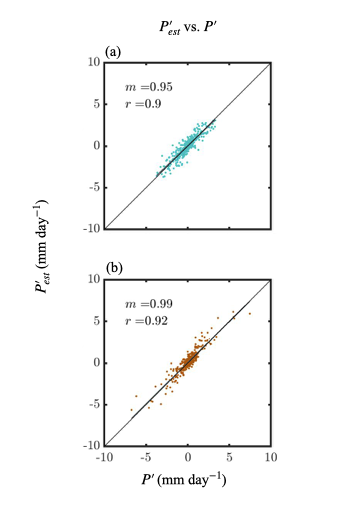

In [25]:
print('OLD MATLAB FIGURE:')
Image("MATLABFigure_Example2.png",width=350, height=350)

Text(0.75, 0.05, 'm =0.92')

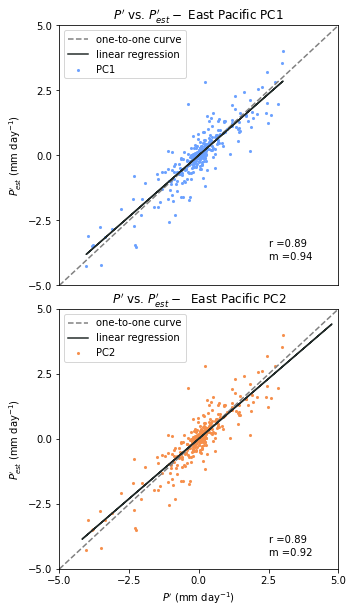

In [26]:
#STEP #3: Plotting 
fig,ax=plt.subplots()
fig.set_size_inches(5,10)
fig.patch.set_visible(False)
ax.axis('off')

#Flattening the precipitation arrays 
#era5 precip
precip_era5_flat_PC1 = np.array(ds_era5['S_precip_Pacific_PC1_ns']).flatten()
precip_era5_flat_PC2 = np.array(ds_era5['S_precip_Pacific_PC2_ns']).flatten()

#era5 estimated precip
precip_est_flat_PC1 = np.array(ds_era5['Pest_total_Pacific_PC1']).flatten()
precip_est_flat_PC2 = np.array(ds_era5['Pest_total_Pacific_PC2']).flatten()


#set up the gridspec
gs=gridspec.GridSpec(nrows=4,ncols=2)

#Axis 1: TRMM Precip - PC1
#scatter plot
ax1=fig.add_subplot(gs[0:2,0:2])

#Plottinhg the one-to-one relationship curve
x_one = np.arange(-5,5+1,1)
y_one = np.arange(-5,5+1,1)
ax1.plot(x_one,y_one,c='grey',label='one-to-one curve',ls = '--')

#scatter figure
c1 = ax1.scatter(precip_era5_flat_PC1*24*3600,precip_est_flat_PC1*24*3600,marker='.',linewidths=0.1,c='#6ba1ff',label='PC1') 
ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax1.set_xticks([-5,-2.5,0,2.5,5])
ax1.xaxis.set_visible(False)
ax1.set_yticks([-5,-2.5,0,2.5,5])
ax1.set_title('$P^\prime$ vs. $P_{est}^\prime -$ East Pacific PC1')
ax1.set_xlabel('$P^\prime$ (mm day$^{-1}$)$')
ax1.set_ylabel('$P_{est}^\prime$ (mm day$^{-1}$)')

#least-squares regression between the two variables
lin_reg1 = stats.linregress(precip_era5_flat_PC1*24*3600,precip_est_flat_PC1*24*3600)
slope1=lin_reg1.slope
intercept1=lin_reg1.intercept
fit1 = slope1*precip_era5_flat_PC1*24*3600 + intercept1
l1 = plt.plot(precip_era5_flat_PC1*24*3600,fit1,color='#222b29',label='linear regression')
plt.legend()

#Displaying the correlation coefficient
rvalue1 = 'r =' + str(f'{lin_reg1.rvalue:.2}')
slope1 = 'm =' + str(f'{lin_reg1.slope:.2}')
plt.annotate(rvalue1,xy=(0.75,0.15),xycoords='axes fraction')
plt.annotate(slope1,xy=(0.75,0.1),xycoords='axes fraction')

#Axis 2: TRMM Precip - PC2
ax2=fig.add_subplot(gs[2:4,0:2])

#Plottinhg the one-to-one relationship curve
ax2.plot(x_one,y_one,c='grey',label='one-to-one curve',ls = '--')

#scatter figure
c2 = ax2.scatter(precip_era5_flat_PC1*24*3600,precip_est_flat_PC1*24*3600,marker='.',linewidths=0.1,c='#f68f4b',label='PC2') 
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax2.set_xticks([-5,-2.5,0,2.5,5])
ax2.set_yticks([-5,-2.5,0,2.5,5])
ax2.set_title('$P^\prime$ vs. $P_{est}^\prime -$  East Pacific PC2')
ax2.set_xlabel('$P^\prime$ (mm day$^{-1}$)')
ax2.set_ylabel('$P_{est}^\prime$ (mm day$^{-1}$)')

#least-squares regression between the two variables
lin_reg2 = stats.linregress(precip_era5_flat_PC2*24*3600,precip_est_flat_PC2*24*3600)
slope2=lin_reg2.slope
intercept2=lin_reg2.intercept
fit2 = slope2*precip_era5_flat_PC2*24*3600 + intercept2
l2 = plt.plot(precip_era5_flat_PC2*24*3600,fit2,color='#222b29',label='linear regression')
plt.legend()

#Displaying the correlation coefficient
rvalue2 = 'r =' + str(f'{lin_reg2.rvalue:.2}')
slope2 = 'm =' + str(f'{lin_reg2.slope:.2}')
plt.annotate(rvalue2,xy=(0.75,0.1),xycoords='axes fraction')
plt.annotate(slope2,xy=(0.75,0.05),xycoords='axes fraction')

Finally, we can compare the attained figure to the one we wanted to replicate above, and we can see that again they are very similar! I actually believe that the correlation figure obtained here, looks better than the one above. 

## PART 6. Summary and Conclusion

In summary, we were able to carry our the regridding of our TRMM precipitation onto the ERA5 grid, we were able to recreate the linear regression maps (and a very similar colormap!), and we were able to recreate the correlation figures and obtained results that arguably look better than the ones provided in the example. 

To conclude, while both of the programming languages hold many advantages, I do believe that the mapping and visualization advantages provided by python outweigh in many cases those in MATLAB, and I do see myself changing to Python in the future for mapping and visualization purposes. 